In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'ds3_train.csv')

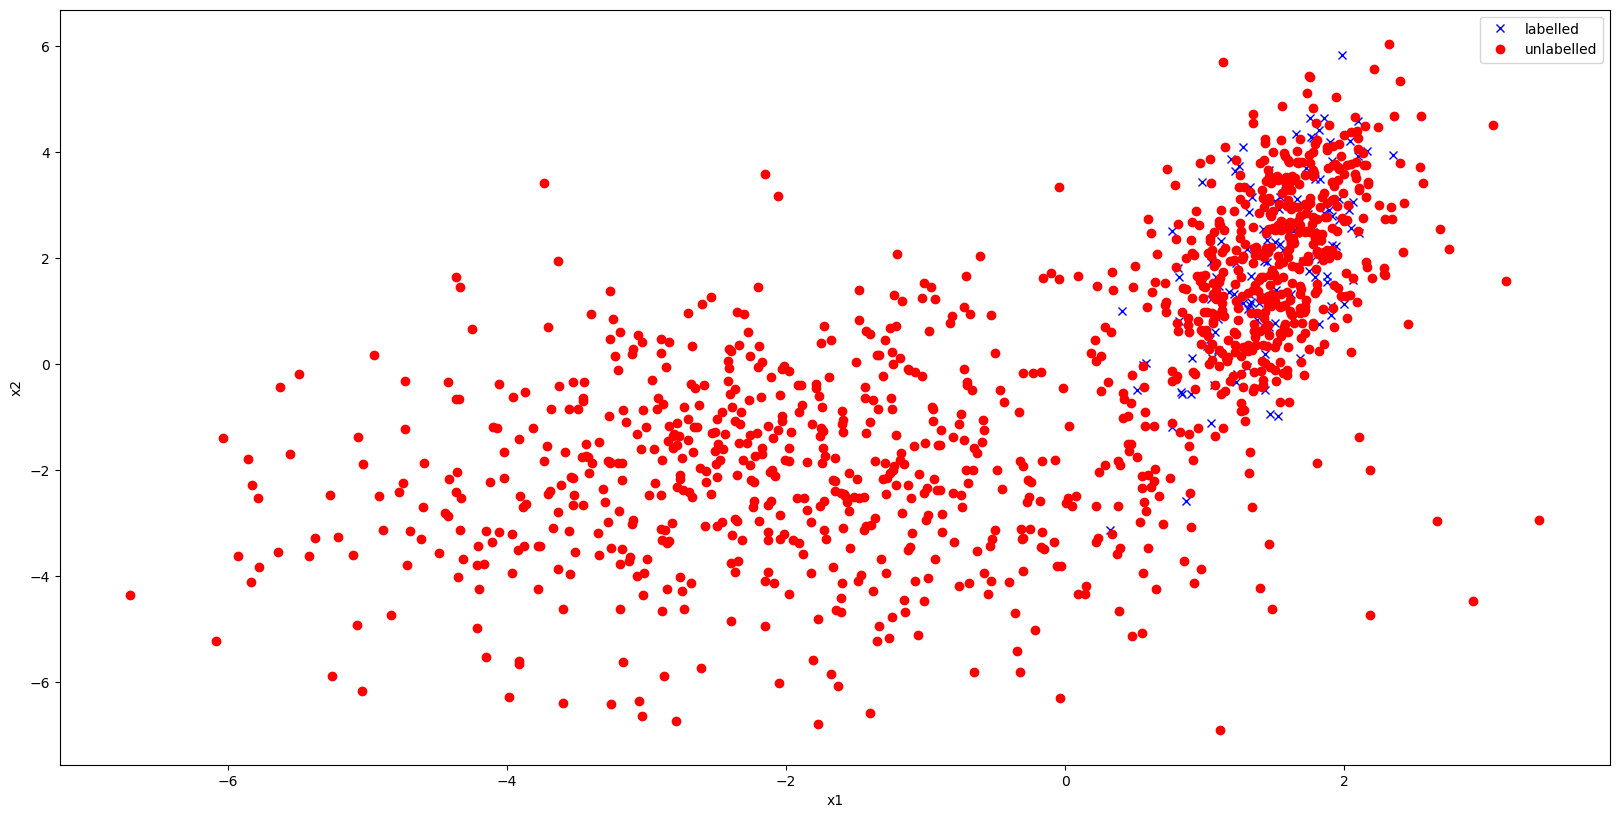

In [3]:
x_train=data.loc[:,['x_1','x_2']]
y_train=data.loc[:,['y']]

ind=y_train[y_train['y']==1].index.tolist()
ind1=y_train[y_train['y']==0].index.tolist()

xx=x_train[['x_1']].values
xx1=x_train[['x_2']].values

x_1_mod=xx[ind,:]
x_1_mod1=xx[ind1,:]

x_2_mod=xx1[ind,:]
x_2_mod1=xx1[ind1 ,:]

plt.figure(figsize=(20,10),dpi=100)
plt.plot(x_1_mod,x_2_mod,'bx',linewidth=1)
plt.plot(x_1_mod1,x_2_mod1,'ro',linewidth=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['labelled','unlabelled'])
plt.show()

xv=x_train.values
colsx=x_train.shape[0]
zer=np.ones((colsx,1))
x_train_new=np.hstack((zer,xv))

In [4]:
#####################################################FITTING THE MODEL##########################################################





itera=0
col_x=(x_train_new.shape[1])
theta1=np.zeros((col_x,1))
all_theta=[]
while itera<100000:
    theta=theta1
    all_theta.append(theta)
    htheta=1/(1+(np.exp(-1*((x_train_new)@theta))))
    del_ltheta=(x_train_new.T)@((y_train.values)-htheta)
    H=((htheta.T).dot((htheta-1)))*((x_train_new.T)@x_train_new)
    H_inv=np.linalg.inv(H)
    theta1=theta-(H_inv@del_ltheta)
    

    #if np.linalg.norm((theta1-theta),ord=1)< 1e-5:
         #break
        
    
    itera+=1

theta=theta1


y_pred=1/(1+(np.exp(-1*((x_train_new)@theta))))

y_pred_new=np.where(y_pred>=0.5,1,0)



error=np.absolute(y_train.values-y_pred_new)
accuracy=100-((np.mean(error))*100)
accuracy

90.0

In [6]:
data_test=pd.read_csv(r'ds3_valid.csv')

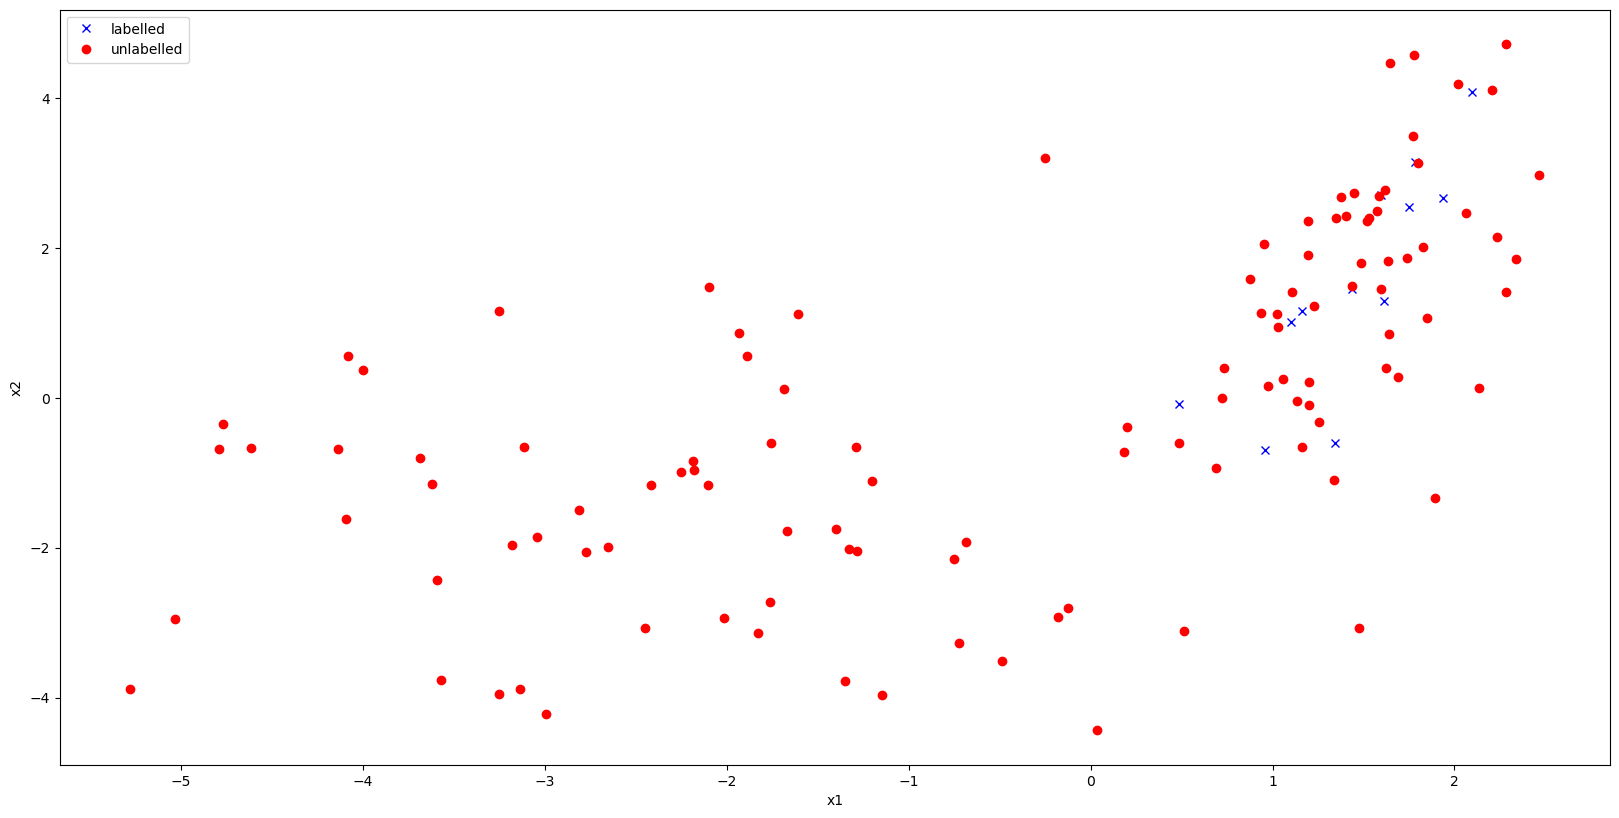

In [7]:
##########################################plotting the test dataset#############################################################

x_test=data_test.loc[:,['x_1','x_2']]
y_test=data_test.loc[:,['y']]

ind_test=y_test[y_test['y']==1].index.tolist()
ind1_test=y_test[y_test['y']==0].index.tolist()

xx_test=x_test[['x_1']].values
xx1_test=x_test[['x_2']].values

x_1_mod_test=xx_test[ind_test,:]
x_1_mod1_test=xx_test[ind1_test,:]

x_2_mod_test=xx1_test[ind_test,:]
x_2_mod1_test=xx1_test[ind1_test,:]

plt.figure(figsize=(20,10),dpi=100)
plt.plot(x_1_mod_test,x_2_mod_test,'bx',linewidth=1)
plt.plot(x_1_mod1_test,x_2_mod1_test,'ro',linewidth=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['labelled','unlabelled'])
plt.show()

xv_test=x_test.values
colsx_test=x_test.shape[0]
zer_test=np.ones((colsx_test,1))
x_test_new=np.hstack((zer_test,xv_test))

In [26]:
y_pred_test=1/(1+(np.exp(-1*((x_test_new)@theta))))

#y_pred_new_test=np.where(y_pred_test>=0.5,1,0)



#error_test=np.absolute(y_test.values-y_pred_new_test)
#accuracy_test=100-((np.mean(error_test))*100)

#accuracy_test
alpha=(y_pred_test[y_test==1].sum())/((y_test==1).sum())
correction=1 + (np.log(2 / alpha - 1) / theta[0])
correction

y    0.188868
dtype: float64